# **RANDOM FOREST REGRESSOR MODEL**

IMPORTING LIBRARIES

In [24]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

PREPROCESSING IMAGES

In [25]:
# Function to extract features from images
def extract_features(image_path, target_size=(256, 256)):
    img = cv2.imread(image_path)
    img = cv2.resize(img, target_size)  # Resize the image to a consistent size
    flattened_img = img.flatten()  # Flatten the image as a feature vector
    return flattened_img

READING THE INPUT

In [26]:
import os
import pandas as pd
import numpy as np

image_folder = '/Users/faizanhabib/Desktop/VitaminDkit/Model/cropped_images'
labels_csv = '/Users/faizanhabib/Desktop/VitaminDkit/Model/new_data.csv'

# Function to load images and labels from a folder and CSV file
def load_images_and_labels(image_folder, labels_csv):
    images, labels = [], []

    labels_df = pd.read_csv(labels_csv)

    print(labels_df)  # Print DataFrame to verify CSV reading

    for filename in os.listdir(image_folder):
        if filename.endswith(('.JPG', '.jpeg', '.png')):
            image_path = os.path.join(image_folder, filename)
            print("Image Path:", image_path)  # Print image path for debugging
            label_row = labels_df[labels_df['Image_File'] == filename]

            if not label_row.empty:
                label = float(label_row['Numeric_Label'].values[0])
                print("Label Row:", label_row)  # Print label row for debugging
                print("Label:", label)  # Print extracted label for debugging
                # Assuming `extract_features` function is defined
                images.append(extract_features(image_path))
                labels.append(label)

    return np.array(images), np.array(labels)

images, labels = load_images_and_labels(image_folder, labels_csv)


     image no.   Numeric_Label      Image_File
0             1           16.0     1-1800K.JPG
1             2           16.0     1-3400K.JPG
2             3           16.0     1-6000K.JPG
3             4            4.0     2-1800K.JPG
4             5            4.0     2-3400K.JPG
..          ...            ...             ...
178         179           44.0  cropped_59.jpg
179         180           85.0  cropped_60.jpg
180         181           62.0  cropped_61.jpg
181         182           71.0  cropped_62.jpg
182         183           27.0  cropped_63.jpg

[183 rows x 3 columns]
Image Path: /Users/faizanhabib/Desktop/VitaminDkit/Model/cropped_images/11-6000K.JPG
Label Row:     image no.   Numeric_Label    Image_File
32          33           77.0  11-6000K.JPG
Label: 77.0
Image Path: /Users/faizanhabib/Desktop/VitaminDkit/Model/cropped_images/cropped_49.jpg
Label Row:      image no.   Numeric_Label      Image_File
168         169           30.0  cropped_49.jpg
Label: 30.0
Image Path: 

In [27]:
print("Shape of images:", images.shape)
print("Shape of labels:", labels.shape)


Shape of images: (183, 196608)
Shape of labels: (183,)


SPLITING DATA

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

TRAINING THE MODEL

In [29]:
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Training model
random_forest_regressor.fit(X_train, y_train)

#predictions on the test set
predictions_RFR = random_forest_regressor.predict(X_test)

PERFORMANCE MEASURES

In [30]:
mse_RFR = mean_squared_error(y_test, predictions_RFR)
r2_RFR = r2_score(y_test, predictions_RFR)

print(f'R2 Score: {r2_RFR}')
print(f"Mean Squared Error: {mse_RFR}")

R2 Score: 0.12993092723575017
Mean Squared Error: 454.1393465675675


In [31]:
# test new data
test_image_path = 'temp.JPG'
test_image = extract_features(test_image_path)
test_image = test_image.reshape(1, -1)

predicted_label = random_forest_regressor.predict(test_image)
print(f'Predicted label: {predicted_label[0]}')

Predicted label: 33.02


In [32]:
# import joblib

# # Save the RFR model
# joblib.dump(random_forest_regressor, 'random_forest_regressor_model.pkl')


VISUALIZING RESULTS

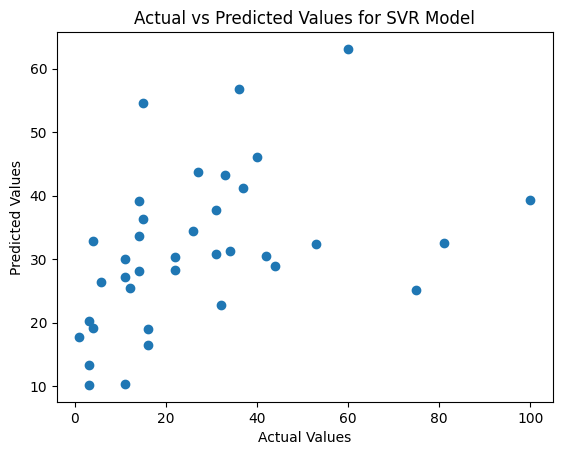

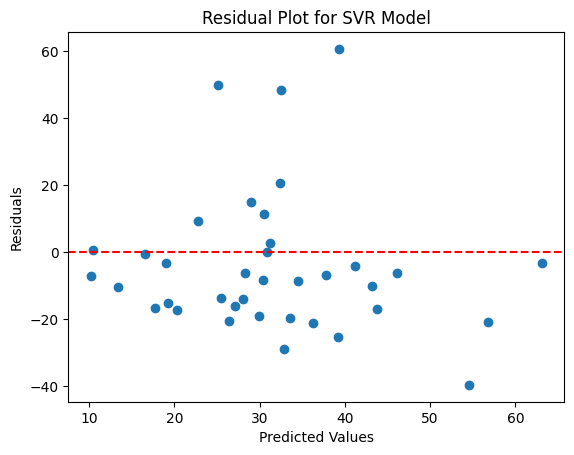

In [33]:
plt.scatter(y_test, predictions_RFR)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for SVR Model')
plt.show()

# Residual plot
residuals = y_test - predictions_RFR
plt.scatter(predictions_RFR, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for SVR Model')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# **Convolutional Neural Network**

IMPORTING LIBRARIES

In [34]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

PREPROCESSING IMAGES

In [35]:
# Function to resize, normalize, and apply histogram equalization to images
def preprocess_image(image_path, target_size):
    img = cv2.imread(image_path)
    img = cv2.resize(img, target_size)  # Resize the image

    #image to grayscale
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #  histogram equalization
    img_equalized = cv2.equalizeHist(img)

    # Normalize pixel values to be between 0 and 1
    img_normalized = normalize(img_equalized)

    # channel dimension
    img_normalized = np.expand_dims(img_normalized, axis=-1)

    return img_normalized

READING THE INPUT

In [36]:
# Function to load images and labels from a folder and CSV file
def load_images_and_labels(image_folder, labels_csv, target_size):
    images, labels = [], []

    labels_df = pd.read_csv(labels_csv)

    for filename in os.listdir(image_folder):
        if filename.endswith(('.JPG', '.jpeg', '.png')):
            image_path = os.path.join(image_folder, filename)
            label_row = labels_df[labels_df['Image_File'] == filename]

            if not label_row.empty:
                label = float(label_row['Numeric_Label'].values[0])
                img = preprocess_image(image_path, target_size)
                images.append(img)
                labels.append(label)

    return np.array(images), np.array(labels)

image_folder = 'cropped_images'
labels_csv = 'new_data.csv'
target_size = (256, 256)

images, labels = load_images_and_labels(image_folder, labels_csv, target_size)

SPLITING DATA

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

CNN MODEL DEFINED

In [38]:
# CNN model
def create_cnn_model(input_shape):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten layer
    model.add(layers.Flatten())

    # Dense (fully connected) layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1))  # Output layer with 1 neuron for regression tasks

    return model

MODEL COMPILATION

In [39]:
input_shape = (256, 256, 1)

model = create_cnn_model(input_shape)

# Compiling model
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

MODEL TRAINING

In [40]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


2024-04-20 00:19:52.549095: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


3/3 [==============================] - 4s 1s/step - loss: 1409.7472 - val_loss: 2013.0801
Epoch 2/10
3/3 [==============================] - 3s 1s/step - loss: 1004.6301 - val_loss: 839.1766
Epoch 3/10
3/3 [==============================] - 4s 1s/step - loss: 614.2038 - val_loss: 1113.3296
Epoch 4/10
3/3 [==============================] - 3s 1s/step - loss: 626.9832 - val_loss: 990.5710
Epoch 5/10
3/3 [==============================] - 3s 1s/step - loss: 548.2809 - val_loss: 837.7388
Epoch 6/10
3/3 [==============================] - 3s 1s/step - loss: 635.2452 - val_loss: 1014.5498
Epoch 7/10
3/3 [==============================] - 3s 975ms/step - loss: 573.4283 - val_loss: 976.6453
Epoch 8/10
3/3 [==============================] - 3s 1s/step - loss: 571.9368 - val_loss: 931.1937
Epoch 9/10
3/3 [==============================] - 3s 996ms/step - loss: 589.5181 - val_loss: 871.9557
Epoch 10/10
3/3 [==============================] - 3s 976ms/step - loss: 553.7198 - val_loss: 1010.7119


EVALUATING MODEL

In [41]:
cnn_predictions = model.predict(X_test).flatten()

1/1 [==============================] - 0s 371ms/step


In [42]:
cnn_mse = mean_squared_error(y_test, cnn_predictions)
cnn_r2 = r2_score(y_test, cnn_predictions)

print(f"CNN Model Mean Squared Error: {cnn_mse}")
print(f"CNN Model R^2 Score: {cnn_r2}")

CNN Model Mean Squared Error: 941.0054482909173
CNN Model R^2 Score: -0.38417433396130174


In [43]:
# test on data
test_image_path = '/Users/faizanhabib/Desktop/VitaminDkit/Model/new/#31-6000K.JPG'
test_image = preprocess_image(test_image_path, target_size)
test_image = test_image.reshape(1, 256, 256, 1)

predicted_label = model.predict(test_image)
print(f'Predicted label: {predicted_label[0][0]}')

[ WARN:0@41907.759] global loadsave.cpp:244 findDecoder imread_('/Users/faizanhabib/Desktop/VitaminDkit/Model/new/#31-6000K.JPG'): can't open/read file: check file path/integrity


error: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


VISUALIZING RESULTS

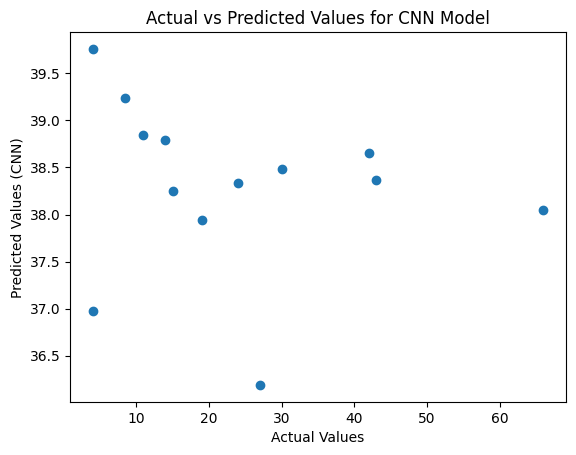

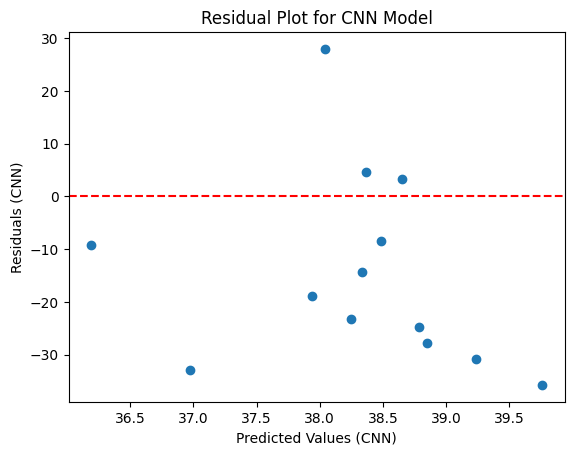

In [ ]:
plt.scatter(y_test, cnn_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (CNN)')
plt.title('Actual vs Predicted Values for CNN Model')
plt.show()

# Residual plot
cnn_residuals = y_test - cnn_predictions
plt.scatter(cnn_predictions, cnn_residuals)
plt.xlabel('Predicted Values (CNN)')
plt.ylabel('Residuals (CNN)')
plt.title('Residual Plot for CNN Model')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:
# Save the CNN model
model.save('cnn_model.h5')


# **SUPPORT VECTOR REFRESSOR MODEL**

IMPORTING LIBRARIES

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

IMAGE PREPORCESSING

In [ ]:
# Function to resize, normalize, and apply histogram equalization to images
def preprocess_image(image_path, target_size):
    img = cv2.imread(image_path)
    img = cv2.resize(img, target_size)  # Resize the image

    #image to grayscale
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #histogram equalization
    img_equalized = cv2.equalizeHist(img)

    # Normalize pixel values to be between 0 and 1
    img_normalized = img_equalized / 255.0

    return img_normalized.flatten()  # Flatten the image as a feature vector

READING DATA

In [ ]:
# Function to load images and labels from a folder and CSV file
def load_images_and_labels(image_folder, labels_csv, target_size):
    images, labels = [], []

    labels_df = pd.read_csv(labels_csv)

    for filename in os.listdir(image_folder):
        if filename.endswith(('.JPG', '.jpeg', '.png')):
            image_path = os.path.join(image_folder, filename)
            label_row = labels_df[labels_df['Image_File'] == filename]

            if not label_row.empty:
                label = float(label_row['Numeric_Label'].values[0])
                img = preprocess_image(image_path, target_size)
                images.append(img)
                labels.append(label)

    return np.array(images), np.array(labels)

image_folder = 'cropped_images'
labels_csv = 'new_data.csv'
target_size = (256, 256)

images, labels = load_images_and_labels(image_folder, labels_csv, target_size)

SPLITIING DATA

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

MODEL PIPELINE

In [ ]:
# Create SVR model with hyperparameters
svr_model = make_pipeline(StandardScaler(), SVR(C=100, epsilon=0.01, kernel='rbf'))

# Train the SVR model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = svr_model.predict(X_test)

EVALUATING MODEL

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 373.8257476229722
R^2 Score: 0.4501200751032808


VISUALIZING RESULTS

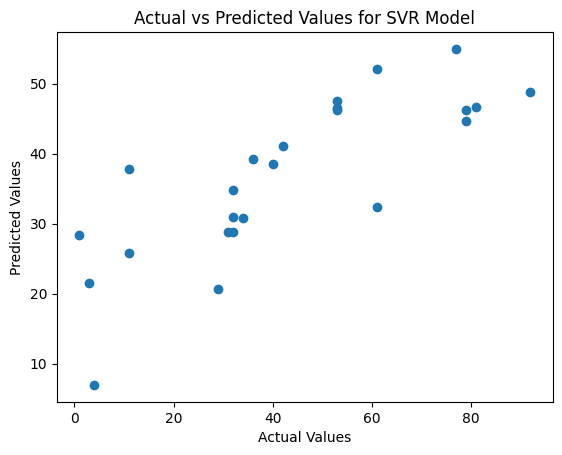

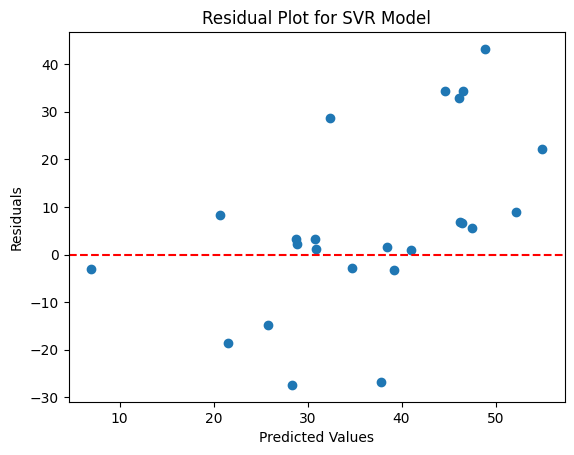

In [ ]:
# Plotting results
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for SVR Model')
plt.show()

# Residual plot
residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for SVR Model')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:
# Save the SVR model
joblib.dump(svr_model, 'svr_model.pkl')


['svr_model.pkl']